In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Задача 7.1

В файле "Для задачи 7_для обучающая и тестовая" имеются размеченные данные по 2 классам. Требуется заполнить классы на листе 7.1 тестовая. В word направить описание решения (+скрипт Python/R)

In [27]:
# загрузка данных с файла, разделитель точка с запятой, заголовок в нулевой строке, кодировка ср1251
df = pd.read_csv('7.1train.csv', sep=";", header=0, encoding='cp1251') 

In [28]:
# замена запятых на точки, чтобы провести преобразованbt obj в float
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
# преобразование во float
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')

0 red
1 blue


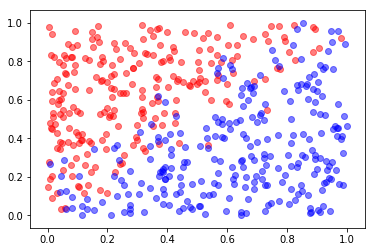

In [29]:
# отрисовка тренировочной (обучающей) выборки
colors = ['red','blue']
for z, c in zip(set(df.K), colors):
    print z, c
    plt.scatter(df[df.K==z].P1, df[df.K==z].P2, c=c, alpha=0.5)
#plt.scatter(df0.P1,df0.P2)
#plt.show()

In [30]:
# разбиение выборки на признаки и ответы
X=df.drop('K',axis=1)
y=df.K

In [31]:
from sklearn import linear_model, metrics

In [32]:
#задаем модель
ridge = linear_model.RidgeClassifier()
#обучаем модель
ridge.fit(X, y)
#получаем ответы на тестовой выборке
predictions_ridge = ridge.predict(X)
print 'Точность модели Ridge на обучающей выборке = ', metrics.accuracy_score(y,predictions_ridge)

Точность модели Ridge на обучающей выборке =  0.894093686354


0 red
1 blue


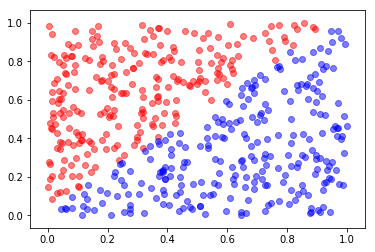

In [33]:
# с тестовой выборкой проводим те же манипуляции
df = pd.read_csv('7.1train.csv', sep=";", header=0, encoding='cp1251') 
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')
X=df.drop('K',axis=1)
y=df.K
# получаем ответы обученной ранее модели на тестовых данных
predictions_ridge = ridge.predict(X)
# отрисовываем
colors = ['red','blue']
for z, c in zip(set(predictions_ridge), colors):
    print z, c
    plt.scatter(df[predictions_ridge==z].P1, df[predictions_ridge==z].P2, c=c, alpha=0.5)

### Задача 7.3

В файле "Для задачи 7_для обучающая и тестовая" имеются размеченные данные по 2 классам. Требуется заполнить классы на листе 7.3 тестовая. В word направить описание решения (+скрипт Python/R)

0 red
1 blue


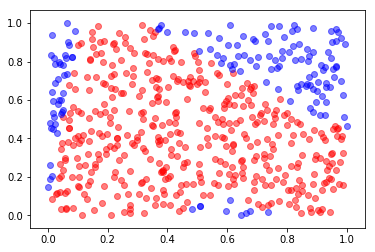

In [34]:
# все то же самое, только для обучения будет выбрана другой алгоритм (решающее дерево)
df = pd.read_csv('7.3train.csv', sep=";", header=0, encoding='cp1251') 
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')
colors = ['red','blue']
for z, c in zip(set(df.K), colors):
    print z, c
    plt.scatter(df[df.K==z].P1, df[df.K==z].P2, c=c, alpha=0.5)

In [35]:
from sklearn import tree

In [36]:
X=df.drop('K',axis=1)
y=df.K
dtree = tree.DecisionTreeClassifier(min_samples_leaf=4) # выбрано в 2 раза меньше, чем количество точек в нижней области
dtree.fit(X,y)
accuracy_dtree = metrics.accuracy_score(y,dtree.predict(X))
print 'Точность модели на решающем дереве =', accuracy_dtree

Точность модели на решающем дереве = 0.982517482517


0 red
1 blue


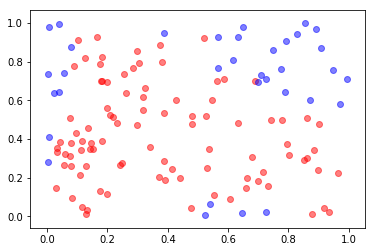

In [37]:
df = pd.read_csv('7.3test.csv', sep=";", header=0, encoding='cp1251') 
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')
X=df.drop('K',axis=1)
y=df.K
colors = ['red','blue']
for z, c in zip(set(dtree.predict(X)), colors):
    print z, c
    plt.scatter(df[dtree.predict(X)==z].P1, df[dtree.predict(X)==z].P2, c=c, alpha=0.5)

### Задача 7.2

В файле "Для задачи 7_для обучающая и тестовая" имеются размеченные данные по 2 классам. Требуется заполнить классы на листе 7.2 тестовая. В word направить описание решения (+скрипт Python/R)

0 red
1 blue


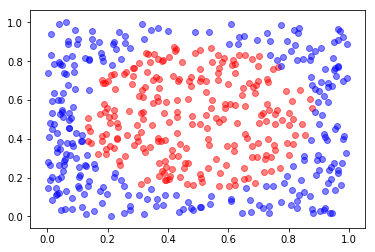

In [38]:
# здесь будет использоваться и решающее дерево и добавление признаков к имеющимся для обучения линейной модели (увеличение признакового пространства)
df = pd.read_csv('7.2train.csv', sep=";", header=0, encoding='cp1251') 
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')
colors = ['red','blue']
for z, c in zip(set(df.K), colors):
    print z, c
    plt.scatter(df[df.K==z].P1, df[df.K==z].P2, c=c, alpha=0.5)

In [39]:
# добавление новых признаков - квадраты и произведение признаков между собой
df['P3'] = df.P1*df.P2
df['P4'] = df.P1**2
df['P5'] = df.P2**2
df.head()

,P1,P2,K,P3,P4,P5
0,0.413129,0.343089,0,0.141740,0.170676,0.117710
1,0.429823,0.513718,0,0.220808,0.184748,0.263906
2,0.807550,0.056642,1,0.045742,0.652137,0.003208
3,0.116214,0.420545,1,0.048873,0.013506,0.176858
4,0.429365,0.538804,0,0.231344,0.184354,0.290310


In [40]:
X=df.drop('K',axis=1)
y=df.K
#задаем модель
ridge = linear_model.RidgeClassifier()
#обучаем модель
ridge.fit(X, y)
#получаем ответы на тестовой выборке
predictions_ridge = ridge.predict(X)
print 'Точность модели Ridge на обучающей выборке = ', metrics.accuracy_score(y,predictions_ridge)
dtree = tree.DecisionTreeClassifier(min_samples_leaf=4) # выбрано в 2 раза меньше, чем количество точек в нижней области
dtree.fit(X,y)
accuracy_dtree = metrics.accuracy_score(y,dtree.predict(X))
print 'Точность модели на решающем дереве =', accuracy_dtree

Точность модели Ridge на обучающей выборке =  0.967935871743
Точность модели на решающем дереве = 0.98997995992


0 red
1 blue


Text(0.5,1,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u0438\u0435 \u043b\u0438\u043d\u0435\u0439\u043d\u043e\u0439 \u043c\u043e\u0434\u0435\u043b\u0438')

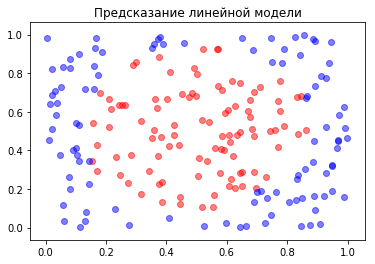

In [41]:
df = pd.read_csv('7.2test.csv', sep=";", header=0, encoding='cp1251') 
df.P1 = df.P1.str.replace(',','.')
df.P2 = df.P2.str.replace(',','.')
df.P1 = df.P1.astype('float64')
df.P2 = df.P2.astype('float64')
df['P3'] = df.P1*df.P2
df['P4'] = df.P1**2
df['P5'] = df.P2**2
X=df.drop('K',axis=1)
y=df.K
#accuracy_dtree = metrics.accuracy_score(y,dtree.predict(X))
colors = ['red','blue']
for z, c in zip(set(ridge.predict(X)), colors):
    print z, c
    plt.scatter(df[ridge.predict(X)==z].P1, df[ridge.predict(X)==z].P2, c=c, alpha=0.5)
plt.title(u'Предсказание линейной модели')

0 red
1 blue


Text(0.5,1,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u0438\u0435 \u0440\u0435\u0448\u0430\u044e\u0449\u0435\u0433\u043e \u0434\u0435\u0440\u0435\u0432\u0430')

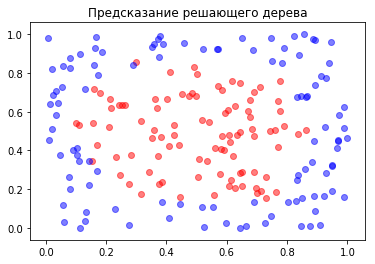

In [42]:
for z, c in zip(set(dtree.predict(X)), colors):
    print z, c
    plt.scatter(df[dtree.predict(X)==z].P1, df[dtree.predict(X)==z].P2, c=c, alpha=0.5)
plt.title(u'Предсказание решающего дерева')

### Задача 7.4

Построить классификатор для Ирисов Фишера.В word направить описание решения (+скрипт Python/R)

In [43]:
from sklearn import datasets
import seaborn as sns

In [44]:
iris = datasets.load_iris()
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [45]:
iris_frame = pd.DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

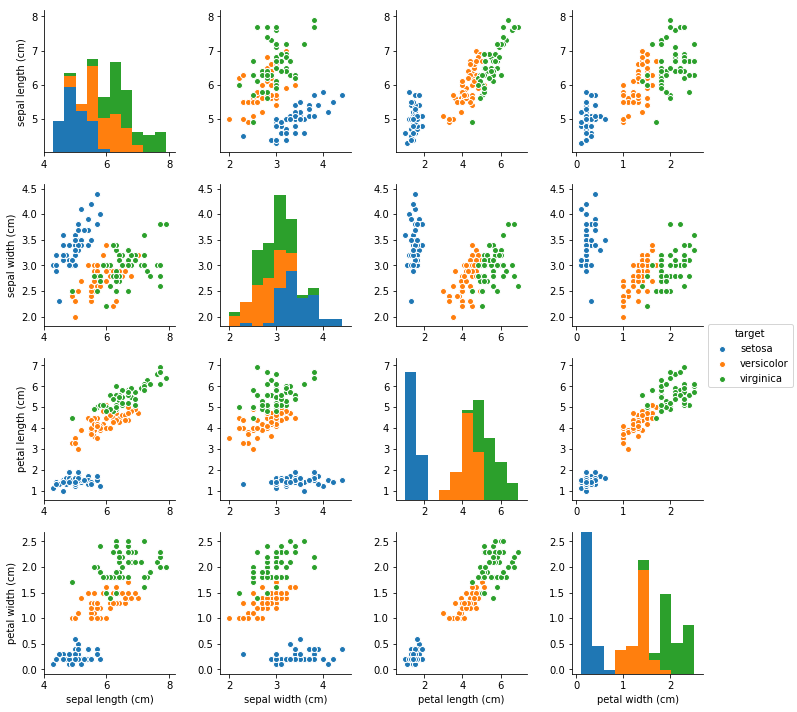

In [46]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])
sns.pairplot(iris_frame, hue = 'target')

In [47]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [48]:
X=iris_frame.drop('target',axis=1)
y=iris_frame.target
dtree = tree.DecisionTreeClassifier(min_samples_leaf=3) # выбрано в 2 раза меньше, чем количество точек в нижней области
dtree.fit(X,y)
accuracy_dtree = metrics.accuracy_score(y,dtree.predict(X))
print 'Точность модели на решающем дереве =', accuracy_dtree

Точность модели на решающем дереве = 0.98
